### Data analysis in astronomy at NTU 

Week 4

Ting-Wen Lan 

This notebook is for exploring the correlation coefficients

In [7]:
import numpy as np
import astropy.io.fits as pf
import matplotlib.pyplot as plt
import my_plot_style as mps
import healpy as hp
import matplotlib.cm as cm
import importlib
import scipy.stats as ss
importlib.reload(mps)

<module 'my_plot_style' from '/Users/twlan/Dropbox/Astro_Research/code/my_plot_style.py'>

### https://www.dropbox.com/s/h7545q0vzcqhi38/sky_maps_new_64_v6.fits?dl=0

In [4]:
ISM = pf.getdata('./data/sky_maps_new_64_v6.fits',1)

In [5]:
EBV = ISM['SFD']
HI = ISM['HI']/1e21

conversion_factor = 2*1e20/1e21
H2 = ISM['CO10']*conversion_factor


/var/folders/xp/28bc3qgn3dx_b_3c82j9rs680000gn/T/ipykernel_60495/1620817260.py:3: RuntimeWarning: invalid value encountered in log10
  hp.mollview(np.log10(H2*1e21),min=19,max=22,title='H2',cmap=cm.jet,unit='$log_{10} N_{H2}$')


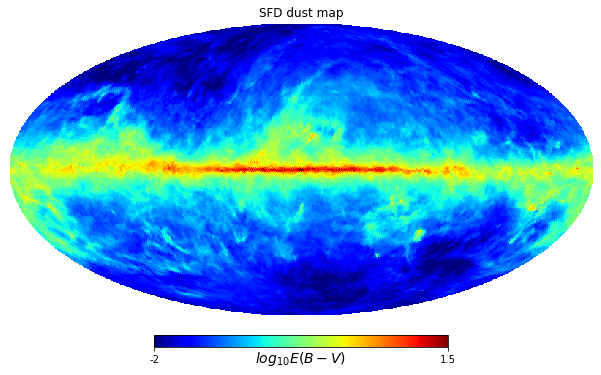

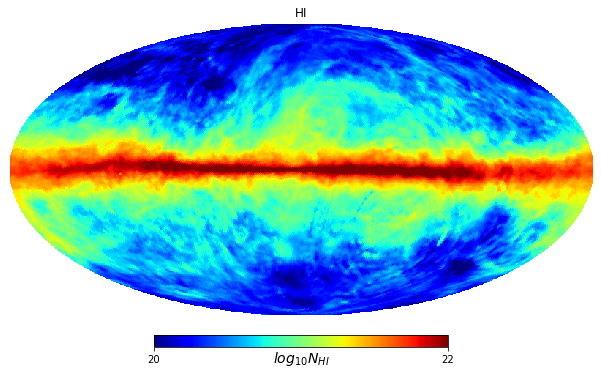

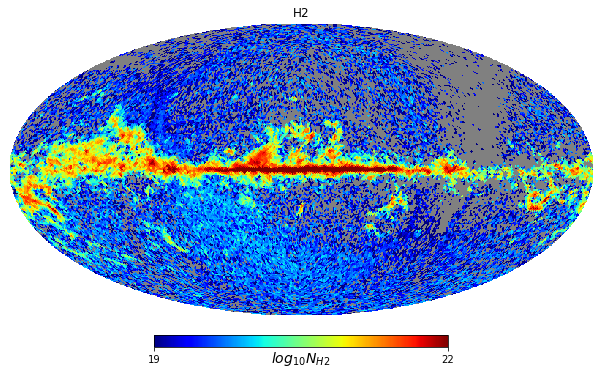

In [8]:
hp.mollview(np.log10(EBV),min=-2,max=1.5,title='SFD dust map',cmap=cm.jet,unit='$log_{10} E(B-V)$')
hp.mollview(np.log10(HI*1e21),min=20,max=22,title='HI',cmap=cm.jet,unit='$log_{10} N_{HI}$')
hp.mollview(np.log10(H2*1e21),min=19,max=22,title='H2',cmap=cm.jet,unit='$log_{10} N_{H2}$')

In [ ]:
plt.figure(figsize=(18,8))
mps.my_plot_style()
plt.subplots_adjust(hspace=0)
plt.subplot(1,2,1)

plt.scatter(EBV,HI,s=0.1,c='C1')
plt.yscale('log')
plt.xscale('log')
plt.xlim(0.03,50)
plt.xlabel('E(B-V) [mag]',fontsize=20)
plt.ylim(0.1,100)
plt.ylabel('$N_{HI}$ [$10^{21} \\rm cm^{-2}$]',fontsize=20)

mps.my_plot_style()



plt.subplot(1,2,2)
plt.scatter(EBV,H2,s=0.1,c='C2')
plt.yscale('log')
plt.xscale('log')
plt.xlim(0.03,50)
plt.ylim(0.01,90)
plt.xlabel('E(B-V) [mag]',fontsize=20)
plt.ylabel('$N_{H2}$ [$10^{21} \\rm cm^{-2}$]',fontsize=20)

### https://www.dropbox.com/s/h7545q0vzcqhi38/sky_maps_new_64_v6.fits?dl=0
### 1. Write your own code to calculate Pearson correlation coefficient between (EBV, HI) (EBV, H2)
### 2. Using boostrap to estimate the uncertainty
### 3. Compare the coefficient from your code and from scipy.stats.pearsonr

In [2]:
ISM = pf.getdata('./data/sky_maps_new_64_v6.fits',1)

NameError: name 'pf' is not defined

In [9]:
EBV = ISM['SFD']
HI = ISM['HI']/1e21

conversion_factor = 2*1e20/1e21 ### A factor to convert CO to H2
H2 = ISM['CO10']*conversion_factor

In [10]:
def your_pearsonr(x,y):
    return pearson_correlation_coefficient

In [11]:
correlation_coefficient(EBV,HI,method='Pearson')
print(ss.pearsonr(EBV,HI))
correlation_coefficient(EBV,H2,method='Pearson')
print(ss.pearsonr(EBV,H2))

NameError: name 'my_pearsonr' is not defined

In [19]:
c = np.array([EBV, H2])
np.corrcoef(c)[0][1]

0.8651329272353959

In [14]:
correlation_coefficient(EBV,HI,method='Pearson')
correlation_coefficient(EBV,HI,method='Spearman')
print(ss.spearmanr(EBV, HI))
correlation_coefficient(EBV,H2,method='Pearson')
correlation_coefficient(EBV,H2,method='Spearman')
print(ss.spearmanr(EBV, H2))

correlation_coefficient(EBV,HI+2*H2,method='Pearson')
correlation_coefficient(EBV,HI+2*H2,method='Spearman')


Pearson
Correlation coefficient=0.767 +- 0.0165
Spearman
Correlation coefficient=0.976 +- 0.0003
SpearmanrResult(correlation=0.9758470186315119, pvalue=0.0)
Pearson
Correlation coefficient=0.865 +- 0.0169
Spearman
Correlation coefficient=0.356 +- 0.0046
SpearmanrResult(correlation=0.35604340319201766, pvalue=0.0)
Pearson
Correlation coefficient=0.947 +- 0.0083
Spearman
Correlation coefficient=0.959 +- 0.0005


In [17]:
x_array = EBV
temp = x_array.argsort()
ranks_x = np.empty(len(temp))
ranks_x[temp] = np.arange(len(x_array))


In [ ]:
test = EBV

Text(0, 0.5, 'Rank')

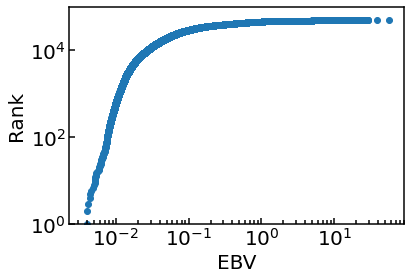

In [24]:
plt.scatter(EBV,ranks_x)
plt.yscale('log')
plt.xscale('log')
plt.ylim(1,1e5)
plt.xlabel('EBV')
plt.ylabel('Rank')

In [12]:
def my_pearsonr(input_x,input_y):
    std_y = np.std(input_y)
    std_x = np.std(input_x)
    cov = np.dot((input_x-np.mean(input_x)),(input_y-np.mean(input_y)))
    #print(cov)
    return cov/std_y/std_x/(len(input_x))

In [13]:
def my_spearmanr(input_x,input_y):
    x_array = input_x
    temp = x_array.argsort()
    ranks_x = np.empty(len(temp))
    ranks_x[temp] = np.arange(len(x_array))
    
    y_array = input_y
    temp = y_array.argsort()
    ranks_y = np.empty(len(temp))
    ranks_y[temp] = np.arange(len(y_array))
    
    spearman_r = my_pearsonr(ranks_x,ranks_y)
    return spearman_r

# Cross-correlation concepts exercise

In [11]:
### https://www.dropbox.com/s/oo9o50jjebjjpor/simple_correlation_100_x_y.npy?dl=0
### https://www.dropbox.com/s/oo9o50jjebjjpor/simple_correlation_1000_x_y.npy?dl=0
### https://www.dropbox.com/s/ew850eai3gkk4st/simple_correlation_10000_x_y.npy?dl=0
### https://www.dropbox.com/s/ew850eai3gkk4st/simple_correlation_1000000_x_y.npy?dl=0

In [12]:
new_data = np.load('simple_correlation_100_x_y.npy')
x = new_data[0,:]
y = new_data[1,:]

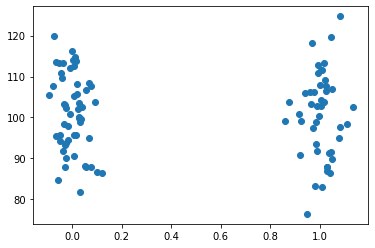

In [13]:
plt.scatter(x+np.random.normal(0,0.05,len(x)),y)

### 1. Write a simple function to calculate the y_0,mean(y) when x==0 and the y_1, mean(y) when x==1
### 2. dy = mean(y_1) - mean(y_0)
### 3. Estimate the uncertainty of dy with error propagation
### 4. Estimate the uncertainty of dy with bootstrap

In [14]:
new_data = np.load('simple_correlation_100_x_y.npy')
x = new_data[0,:]
y = new_data[1,:]

measured_signal = calculate_signal(x,y)
print(measured_signal)

-0.5468913258301743


In [15]:
### normal error propagation
search = np.where(x==0)[0]
y_0_err = np.std(y[search])/np.sqrt(len(search))
search = np.where(x==1)[0]
y_1_err = np.std(y[search])/np.sqrt(len(search))

In [16]:
np.sqrt(y_1_err**2+y_0_err**2)

1.9984419714919832

In [17]:
### Bootstrap error
bootstrap_value = []
bootstrap_time = 200
for i in range(0,bootstrap_time):
    random_index = np.random.randint(0,len(x),len(x))
    bootstrap_value.append(calculate_signal(x[random_index],y[random_index]))

In [18]:
def calculate_signal(x,y):
    search = np.where(x==0)
    est_y_background = np.mean(y[search[0]])  
    search = np.where(x==1)
    return np.mean((y[search[0]]-est_y_background))#[search[0]])

Measured signal:-0.55, bootstrap uncertainty:1.999


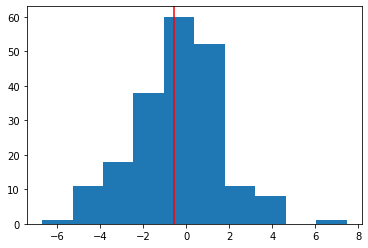

In [19]:
plt.hist(bootstrap_value)
plt.axvline(measured_signal,c='r')
print('Measured signal:%0.2f, bootstrap uncertainty:%0.3f' % (measured_signal,np.std(bootstrap_value)))

In [1]:
def correlation_coefficient(x,y,method='Pearson'):
    bootstrap_correlation = []
    bootstrap_time = 200
    
    if method=='Pearson':
        coeff = my_pearsonr(x,y)
        for i_boot in range(0,bootstrap_time):
            random_index = np.random.randint(0,len(x),len(x))
            bootstrap_correlation.append(my_pearsonr(x[random_index],y[random_index]))
    
    elif method=='Spearman':
        coeff = my_spearmanr(x,y)    
        for i_boot in range(0,bootstrap_time):
            random_index = np.random.randint(0,len(x),len(x))
            bootstrap_correlation.append(my_spearmanr(x[random_index],y[random_index]))
            
    print(method)
    print('Correlation coefficient=%0.3f +- %0.4f' % (coeff, np.std(bootstrap_correlation)))

In [28]:
bootstrap_correlation = []
bootstrap_time = 200
for i_boot in range(0,bootstrap_time):
    random_index = np.random.randint(0,len(EBV),len(EBV))
    #random_index2 = np.random.randint(0,len(EBV),len(EBV))
    bootstrap_correlation.append(my_pearsonr(EBV[random_index],HI[random_index]))

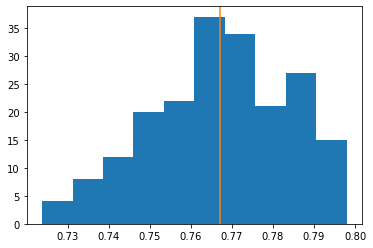

In [31]:
_ = plt.hist(bootstrap_correlation)
plt.axvline(0.767,color='C1')

In [25]:
np.std(bootstrap_correlation)

0.01620827363844211